In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [524]:
data = pd.read_csv('/naman/pgads/loan.csv')

In [525]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [526]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [527]:
data.shape

(614, 13)

In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [529]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [530]:
# dropping loan id as it is unqiue and doest not provide much info
data.drop('Loan_ID', axis=1, inplace=True)

In [531]:
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### EDA

In [532]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

([<matplotlib.patches.Wedge at 0x26c01803490>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'Accepted'),
  Text(0.6382939131211474, -0.9565985994514591, 'Rejected')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.7%'),
  Text(0.36077482045977893, -0.5406861649073464, '31.3%')])

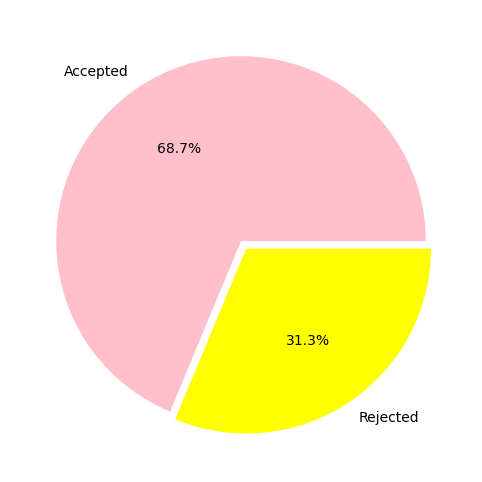

In [533]:
plt.figure(figsize=(10,6))
labels = ['Accepted', 'Rejected']
explode = [.0,.05]
myColors = ['pink', 'yellow']
size = data.Loan_Status.value_counts()
plt.pie(size, explode = explode, labels = labels, colors = myColors, autopct='%1.1f%%')

#### Firstly analyze the numerical data

In [534]:
data_num = data.select_dtypes(include=np.number)
data_num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [535]:
data_num.drop(['Loan_Amount_Term','Credit_History'], axis=1, inplace=True)

In [536]:
data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [537]:
data_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [538]:
# distribution test

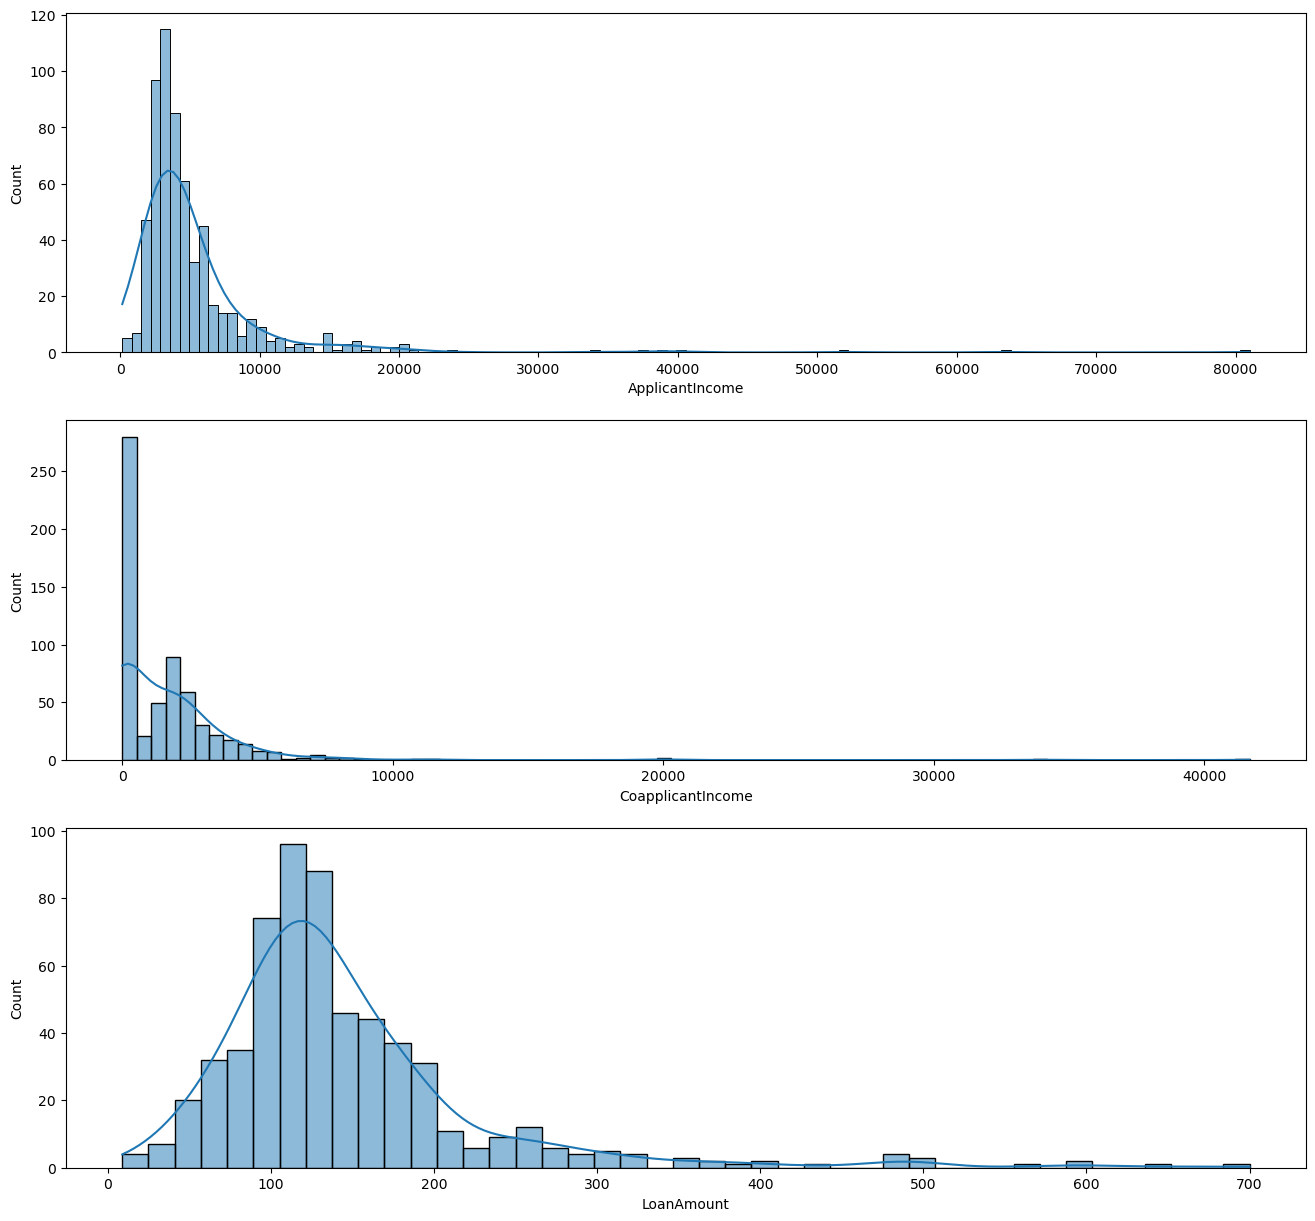

In [539]:
fig,axs=plt.subplots(3,1, figsize=(16,15))
plt1=sns.histplot(data['ApplicantIncome'],bins='auto', kde=True,ax=axs[0])
plt1=sns.histplot(data['CoapplicantIncome'],bins='auto', kde=True,ax=axs[1])
plt1=sns.histplot(data['LoanAmount'],bins='auto', kde=True,ax=axs[2])
plt.show()

1. 

<Axes: >

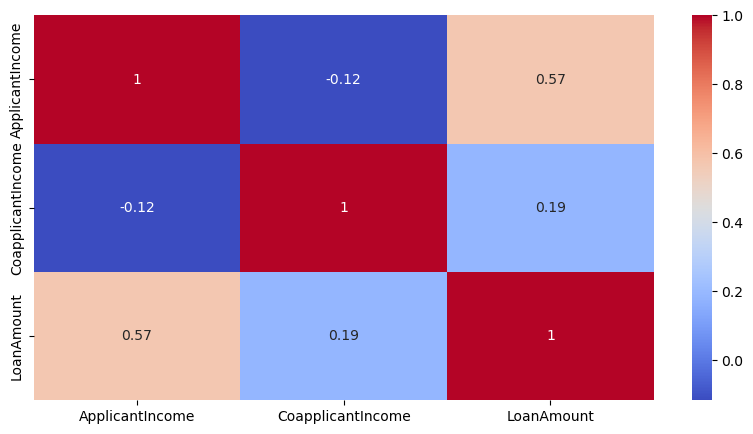

In [540]:
# Analyzing the relation between these numerical columns
plt.figure(figsize=(10,5))
sns.heatmap(data_num.corr(), annot=True, cmap='coolwarm')

Loan Amount is dependent on Applicant Income

In [541]:
### Analyze the categorical Features

In [542]:
data_cat = data.select_dtypes(include=np.object_)
data_cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

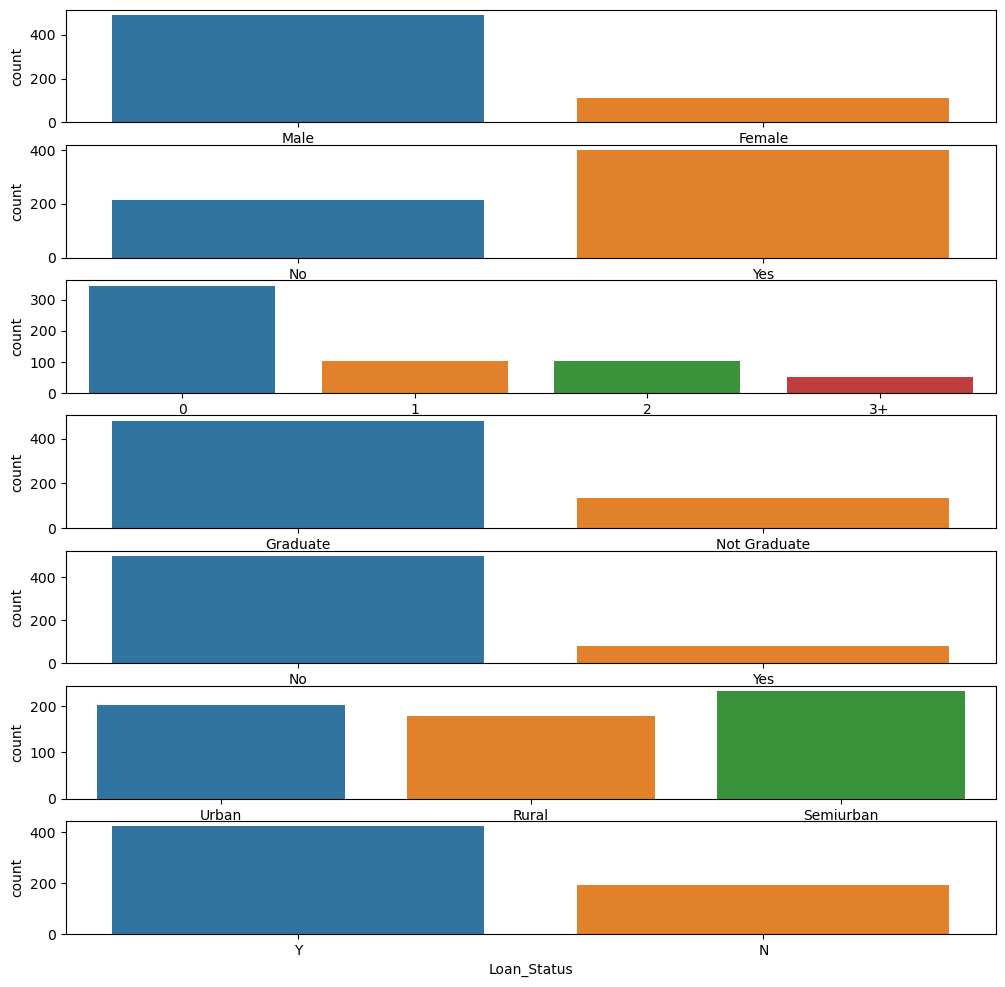

In [543]:
fig, ax = plt.subplots(7,1, figsize=(12,12))
cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area', 'Loan_Status']

for i,val in enumerate(cols):
    sns.countplot(x=val, data=data, ax=ax[i])

<Axes: xlabel='Property_Area', ylabel='count'>

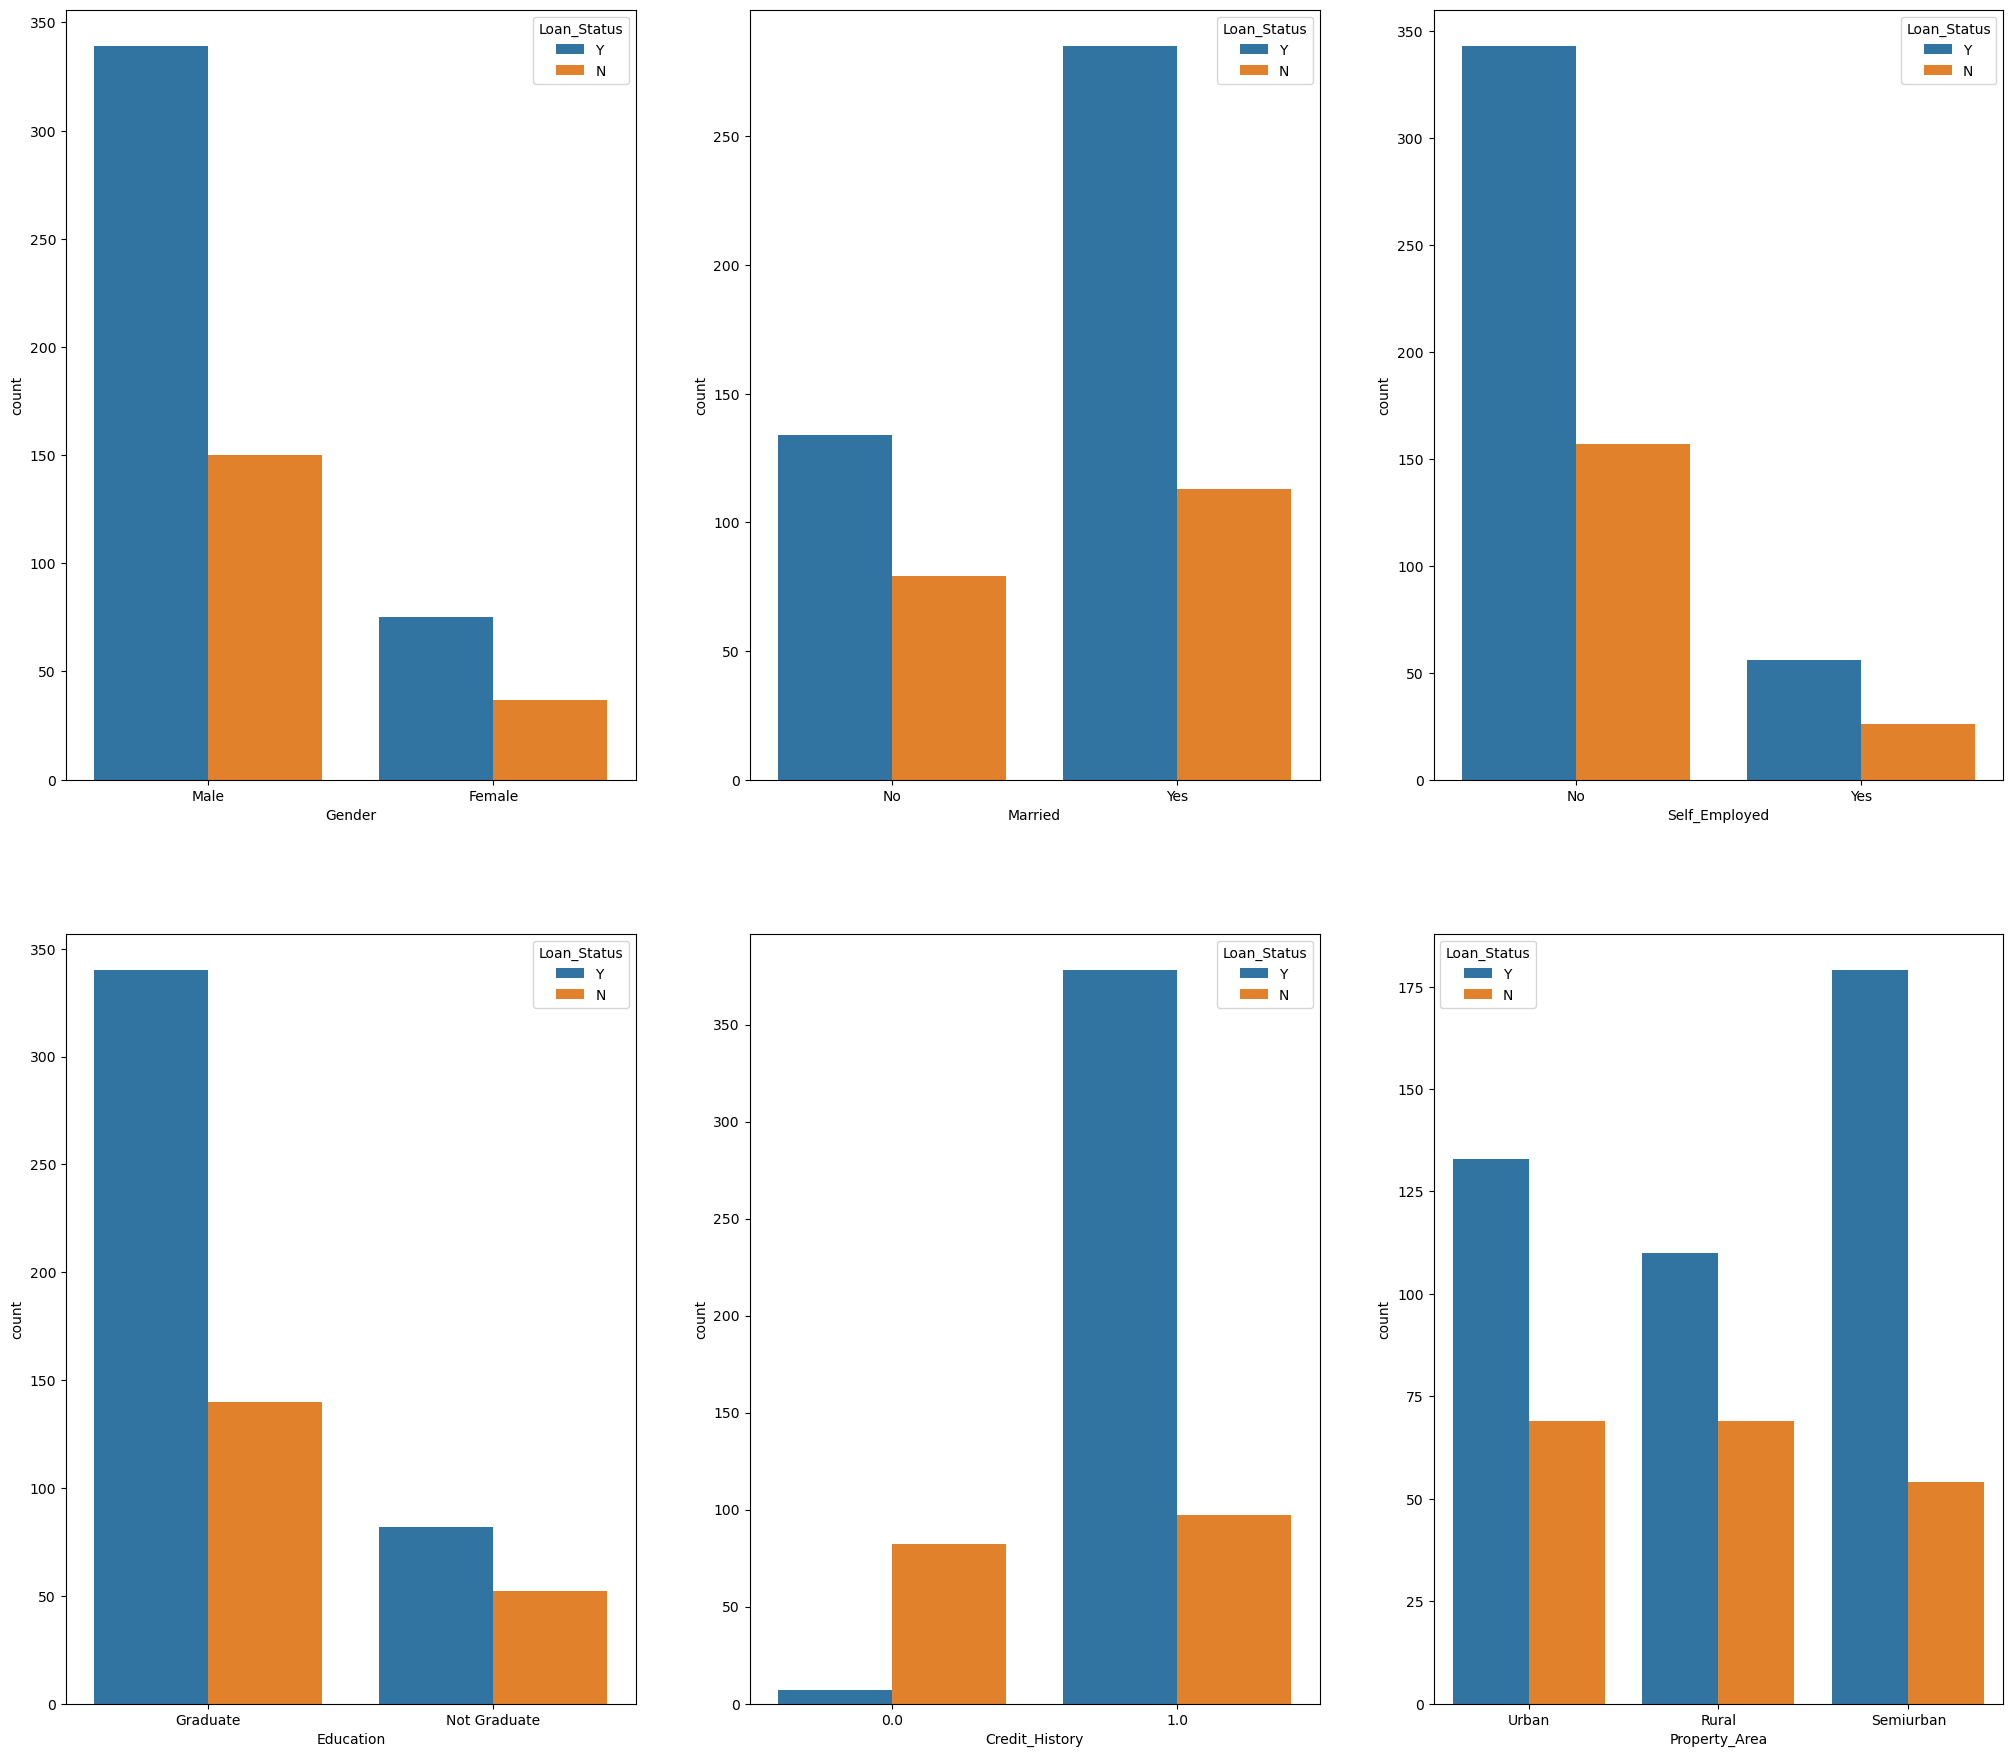

In [544]:
fig, ax = plt.subplots(2,3, figsize=(25,22))
sns.countplot(x="Gender", hue='Loan_Status', data=data, ax=ax[0][0])
sns.countplot(x="Married", hue='Loan_Status', data=data, ax=ax[0][1])
sns.countplot(x="Self_Employed", hue='Loan_Status', data=data, ax=ax[0][2])

sns.countplot(x="Education", hue='Loan_Status', data=data, ax=ax[1][0])
sns.countplot(x="Credit_History", hue='Loan_Status', data=data, ax=ax[1][1])
sns.countplot(x="Property_Area", hue='Loan_Status', data=data, ax=ax[1][2])

- Gender, Martial Status doest not impact loan status
- It seems people with a credit history of 1 are more likely to get their loans approved.
- The proportion of loans getting approved in semi-urban areas is higher as compared to that in rural or urban areas.

### Feature Engineering

In [545]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [546]:
# handlinf missing values
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [547]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [548]:
# converting categorical value to numeric by using the LABEL ENCODING

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area',
       'Loan_Status', 'Education']

for i in cols:
    data[i] = le.fit_transform(data[i])    

In [549]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


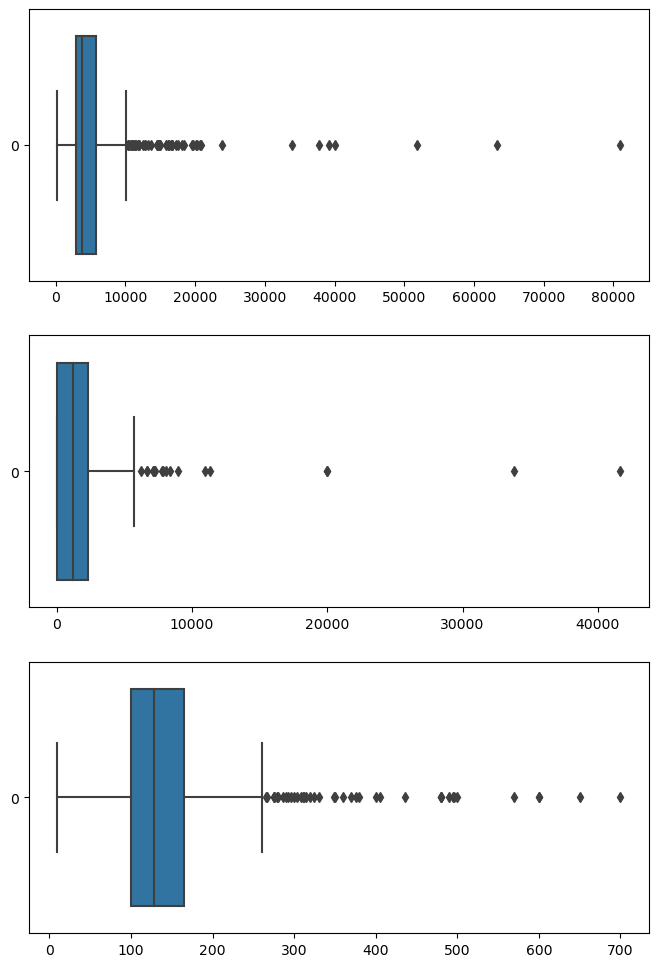

In [550]:
# outliers 
fig,axs=plt.subplots(3,1, figsize=(8,12))
plt1=sns.boxplot(data['ApplicantIncome'],orient='h',ax=axs[0])
plt1=sns.boxplot(data['CoapplicantIncome'],orient='h',ax=axs[1])
plt1=sns.boxplot(data['LoanAmount'],orient='h',ax=axs[2])
plt.show()

- there are extreme outliers

In [551]:
# removing extreme outliers for ApplicantIncome
q3 = data.ApplicantIncome.quantile(0.75)
q1 = data.ApplicantIncome.quantile(0.25)

iqr = q3-q1

lower = q1 - 3 * iqr
upper= q3 + 3 * iqr

In [552]:
lower, upper

(-5875.0, 14547.5)

In [553]:
q1,q3

(2877.5, 5795.0)

In [554]:
iqr

2917.5

In [555]:
data = data[(data['ApplicantIncome'] >= lower) & (data['ApplicantIncome'] <= upper)]

In [556]:
# removing extreme outliers for CoapplicantIncome
q3 = data.CoapplicantIncome.quantile(0.75)
q1 = data.CoapplicantIncome.quantile(0.25)

iqr = q3-q1

lower_1 = q1 - 3 * iqr
upper_1= q3 + 3 * iqr

In [557]:
data = data[(data['CoapplicantIncome'] >= lower) & (data['CoapplicantIncome'] <= upper)]

In [558]:
# removing extreme outliers for LoanAmount
q3 = data.LoanAmount.quantile(0.75)
q1 = data.LoanAmount.quantile(0.25)

iqr = q3-q1

lower_2 = q1 - 3 * iqr
upper_2 = q3 + 3 * iqr

In [559]:
data = data[(data['LoanAmount'] >= lower) & (data['LoanAmount'] <= upper)]

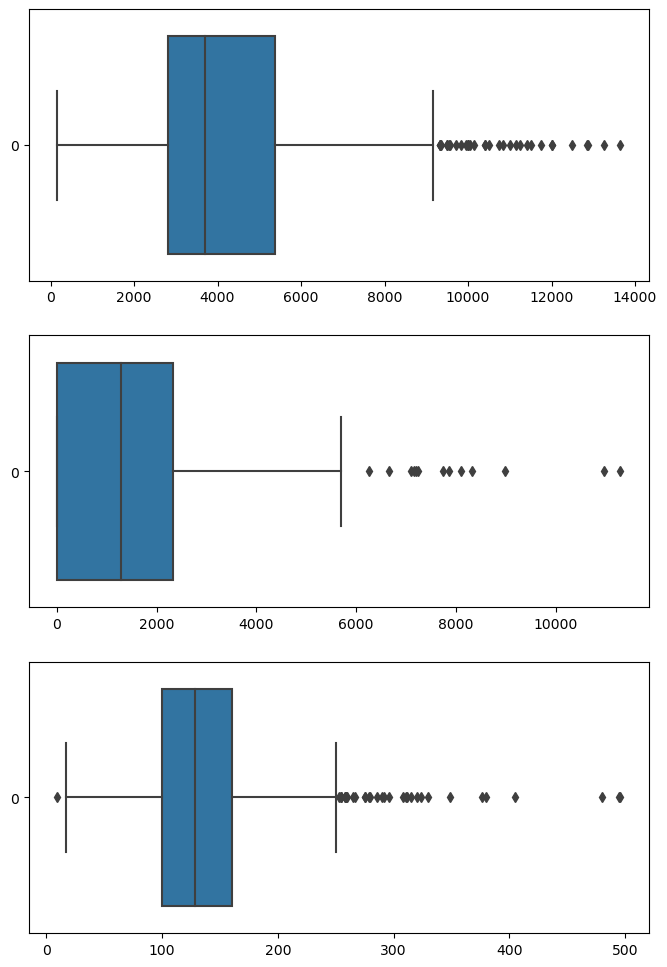

In [560]:
fig,axs=plt.subplots(3,1, figsize=(8,12))
plt1=sns.boxplot(data['ApplicantIncome'],orient='h',ax=axs[0])
plt1=sns.boxplot(data['CoapplicantIncome'],orient='h',ax=axs[1])
plt1=sns.boxplot(data['LoanAmount'],orient='h',ax=axs[2])
plt.show()

### Feature Selection 

####  chi2 test for independence (categorical data only)
- Null hypothesis: variables are independent to each other
- Alternate hypothesis: variables are dependent

In [561]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1


In [562]:
from sklearn.feature_selection import chi2

In [563]:
x1 = data[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area','Education','Credit_History','Loan_Amount_Term']]
y1 = data.Loan_Status

In [564]:
# returns f score and p value
f_score = chi2(x1, y1)
f_score

(array([ 0.08830594,  1.52631301,  0.03299925,  0.32264178,  0.30251592,
         4.19179399, 26.10106664,  3.29163262]),
 array([7.66341955e-01, 2.16666641e-01, 8.55851950e-01, 5.70024340e-01,
        5.82309445e-01, 4.06200908e-02, 3.24004980e-07, 6.96337512e-02]))

In [565]:
p_value = pd.Series(f_score[1], index=x1.columns)
p_value

Gender              7.663420e-01
Married             2.166666e-01
Dependents          8.558519e-01
Self_Employed       5.700243e-01
Property_Area       5.823094e-01
Education           4.062009e-02
Credit_History      3.240050e-07
Loan_Amount_Term    6.963375e-02
dtype: float64

In [566]:
irr_cols = []
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,':- Reject Null Hypothesis')
    else:
        print(x, ':- Accept Null Hypothesis')
        irr_cols.append(x)

Gender :- Accept Null Hypothesis
Married :- Accept Null Hypothesis
Dependents :- Accept Null Hypothesis
Self_Employed :- Accept Null Hypothesis
Property_Area :- Accept Null Hypothesis
Education :- Reject Null Hypothesis
Credit_History :- Reject Null Hypothesis
Loan_Amount_Term :- Accept Null Hypothesis


In [567]:
# dropping the irrevelant columns 
data.drop(irr_cols, axis=1, inplace=True)

In [568]:
data.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status
0,0,5849,0.0,128.0,1.0,1
1,0,4583,1508.0,128.0,1.0,0
2,0,3000,0.0,66.0,1.0,1
3,1,2583,2358.0,120.0,1.0,1
4,0,6000,0.0,141.0,1.0,1


In [569]:
# data split

In [570]:
x = data.drop('Loan_Status', axis=1) # feature
y = data['Loan_Status']    # target

In [571]:
# split the data into train and test set

In [580]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.20, random_state=42)

In [581]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((462, 5), (116, 5), (116,), (462,))

### Model Building 

In [582]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [583]:
# Fit the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [584]:
pred = dt.predict(x_test)
pred

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0])

### Model Evalution

In [588]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 68.1034
roc_auc_score = 59.3615
F1 Score = 78.1065


In [589]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.45      0.38      0.41        34
           1       0.76      0.80      0.78        82

    accuracy                           0.68       116
   macro avg       0.60      0.59      0.60       116
weighted avg       0.67      0.68      0.67       116



<Axes: >

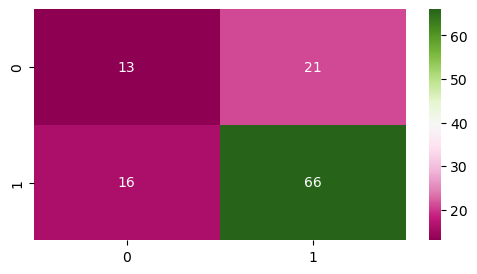

In [595]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='PiYG')

### Hyper Parameter Tunning
- Manual tunning

In [596]:
dt_tune = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [597]:
dt_tune.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [599]:
pred = dt_tune.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [600]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 78.4483
roc_auc_score = 63.2353
F1 Score = 86.7725


In [601]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.42        34
           1       0.77      1.00      0.87        82

    accuracy                           0.78       116
   macro avg       0.88      0.63      0.64       116
weighted avg       0.83      0.78      0.74       116



<Axes: >

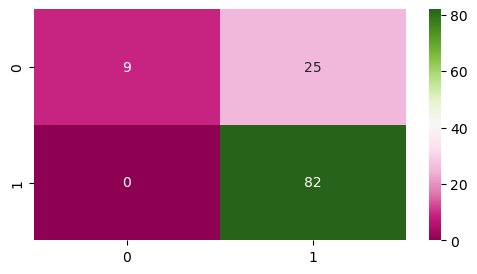

In [603]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='PiYG')

### Grid Search CV

In [604]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [605]:
# max number of level in tree
max_depth = [int(x) for x in np.linspace(3,50,20)]

# min number of sample required to  split a node
min_samples_split = [5,8,12,15,20,30,35,45]

param_grid = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'criterion':['entropy', 'ginni impurity']}

In [606]:
grid_model = GridSearchCV(dt, param_grid, cv=3)

In [618]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'ginni impurity'],
                         'max_depth': [3, 5, 7, 10, 12, 15, 17, 20, 22, 25, 27,
                                       30, 32, 35, 37, 40, 42, 45, 47, 50],
                         'min_samples_split': [5, 8, 12, 15, 20, 30, 35, 45]})

In [608]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30)

In [616]:
grid_model.best_score_

0.8095238095238094

In [610]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 30}

In [611]:
# again training and predicting
dt_grid = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30)

In [612]:
dt_grid.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30)

In [613]:
pred = dt_tune.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [614]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 78.4483
roc_auc_score = 63.2353
F1 Score = 86.7725


In [615]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.42        34
           1       0.77      1.00      0.87        82

    accuracy                           0.78       116
   macro avg       0.88      0.63      0.64       116
weighted avg       0.83      0.78      0.74       116



### Randomized Search CV

In [617]:
# max number of level in tree
max_depth = [int(x) for x in np.linspace(3,50,20)]

# min number of sample required to  split a node
min_samples_split = [5,8,12,15,20,30,35,45]

param_grid = {'max_depth':max_depth, 'min_samples_split':min_samples_split, 'criterion':['entropy', 'ginni impurity']}

In [620]:
random_model = RandomizedSearchCV(dt, param_grid, cv=3)

In [621]:
random_model.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy',
                                                      'ginni impurity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 8, 12, 15, 20,
                                                              30, 35, 45]})

In [623]:
random_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=35)

In [624]:
random_model.best_score_

0.8030303030303031

In [626]:
dt_random = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=35)

In [627]:
dt_grid.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=30)

In [628]:
pred = dt_tune.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [629]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 78.4483
roc_auc_score = 63.2353
F1 Score = 86.7725


In [630]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.26      0.42        34
           1       0.77      1.00      0.87        82

    accuracy                           0.78       116
   macro avg       0.88      0.63      0.64       116
weighted avg       0.83      0.78      0.74       116

